In [1]:

import sys, os
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB : 
    # va s exécuter sur google colab
    from google.colab import drive
    drive.mount('/content/gdrive')
    root_dir = "/content/gdrive/My Drive/cours_deep/cours_epsi/git/mlcourse.ai"
    get_file = lambda fn : os.path.join(root_dir, "data", fn)
else :
    # avec jupyter, le cad est le folder ou se trouve le notebook
    get_file = lambda fn : os.path.join("..", "..", "data", fn)
%pwd



'/home/louis/dev/git/mlcourse.ai/jupyter_english/tp'

In [ ]:
!pip install utillc

In [2]:
import numpy as np
import pandas as pd
import os
from utillc import *
import io
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from time import time

from sklearn import metrics
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


def tree_graph_to_png(tree, feature_names, png_file_to_save):
    #tree_str = export_graphviz(
    #    tree, feature_names=feature_names, filled=True, out_file=None
    #)
    plot_tree(tree)
    #graph = pydotplus.graph_from_dot_data(tree_str)
    #graph.write_png(png_file_to_save)
    

pd.set_option("display.precision", 2)
file = os.path.join("traffic_accidents.csv")
file = "/home/louis/Desktop/traffic_accidents.csv"
file = "/home/louis/Desktop/heart_disease.csv"
file = "/home/louis/dev/git/mlcourse.ai/data/telecom_churn.csv"


df = pd.read_csv(file).dropna(axis=1)

try :
    df = df.drop("crash_date", axis=1)
except :
    pass

try :
    df = df.drop(["Churn", "State"], axis=1)
    df["International plan"] = df["International plan"].map({"Yes": 1, "No": 0})
    df["Voice mail plan"] = df["Voice mail plan"].map({"Yes": 1, "No": 0})    
except :
    pass

df1 = df.copy()
EKOX(df.head())

def get_info(df) :
    buf = io.StringIO()
    df.info(buf=buf)
    s = buf.getvalue()
    return s

for ct, c in zip(df.dtypes, df.columns) :
    if ct.name == "object" :
        EKON(c, ct.name)
        one_hot = pd.get_dummies(df[c], prefix=c)
        df1 = df1.drop(c, axis = 1)
        df1 = df1.join(one_hot)


/tmp/ipykernel_42607/4155317609.py:53: [0729ms] df.head()=   Account length  Area code  International plan  Voice mail plan  \
0             128        415                   0                1   
1             107        415                   0                1   
2             137        415                   0                0   
3              84        408                   1                0   
4              75        415                   1                0   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99          

/tmp/ipykernel_42607/2438920631.py:1: [0071ms] df1.shape=(3333, 18).
/tmp/ipykernel_42607/2438920631.py:5: [0082ms] df.head()=   Account length  Area code  International plan  Voice mail plan  \
0             128        415                   0                1   
1             107        415                   0                1   
2             137        415                   0                0   
3              84        408                   1                0   
4              75        415                   1                0   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge 

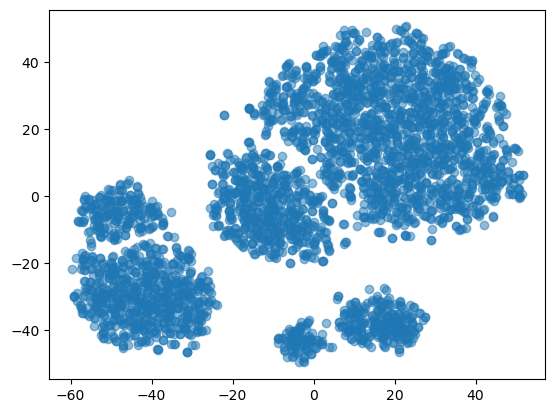

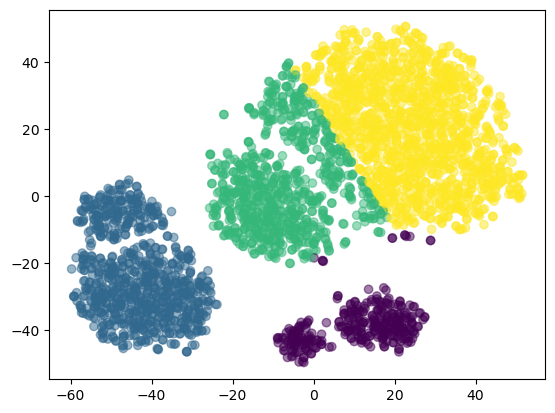

/tmp/ipykernel_42607/2438920631.py:22: [21744ms] clf_tree=DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17).


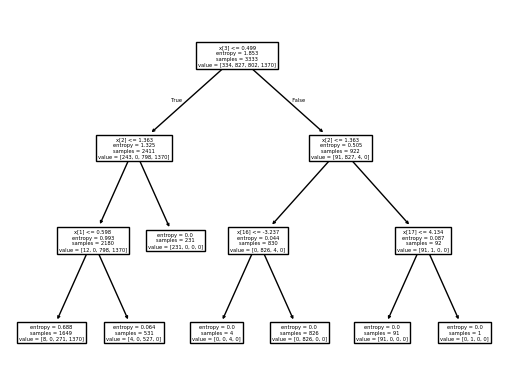

In [3]:
EKOX(df1.shape)    
scaler = StandardScaler()
X = df1._get_numeric_data()
X_scaled = scaler.fit_transform(X)
EKOX(df.head())


tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=0.5);
plt.show()

data = tsne_repr[:,0:2]
km = KMeans(n_clusters=4, random_state=1, n_init=10)
km.fit(data)
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], c=km.labels_, alpha=0.5);
plt.show()

y = km.labels_
clf_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=17)
clf_tree.fit(X_scaled, y)
EKOX(clf_tree)

tree_graph_to_png(
    tree=clf_tree,
    feature_names=["x1", "x2"],
    png_file_to_save="./tree.png")
plt.plot()
plt.show()
    
